In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X = np.array([[0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1,]])
y = np.array([[0],
              [1],
              [1],
              [0]])
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [5]:
def sigmoid(x):
    sigm = 1. / (1. + np.exp(-x))
    return sigm

def sigmoid_derivative(x):
    return sigmoid(x) * (1.-sigmoid(x))

def compute_loss(y_hat, y):
    return ((y_hat - y)**2).sum()

In [28]:
class NeuralNetwork:
    def __init__(self, x, y, seed=10):
        self.input      = x
        np.random.seed(seed)
        self.weights1   = np.random.rand(self.input.shape[1],4) #4 neurons in 2nd (1st hidden) layer 
        self.weights2   = np.random.rand(4,1)                 # output layer has only 1 neuron 
        self.y          = y
        self.output     = np.zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
        

In [29]:
nn = NeuralNetwork(X,y)

loss_values = []

for i in range(5000):
    nn.feedforward()
    nn.backprop()
    loss = compute_loss(nn.output, y)
    loss_values.append(loss)

print(nn.output)
print(f" final loss : {loss}")

[[0.01551015]
 [0.97832249]
 [0.9779799 ]
 [0.01932374]]
 final loss : 0.0015687714602901782


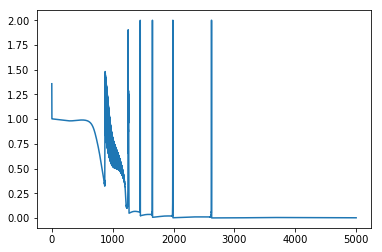

In [30]:
plt.plot(loss_values)